In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import norm
from sympy import *
init_printing(use_latex='mathjax')

# 1. Walk Score For All NYC Neighborhoods

In [3]:
a = np.array([100,100,100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,98,97,97,97,97,
97,97,97,97,97,97,96,96,96,96,96,96,96,96,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,94,94,94,94,94,94,94,94,93,93,
93,93,93,93,93,93,93,93,93,93,92,92,92,92,92,92,92,91,91,91,91,90,90,90,90,90,90,90,90,89,89,89,89,89,89,89,89,88,88,88,
88,88,88,88,88,88,88,87,86,85,85,84,84,84,84,84,84,83,83,83,83,83,82,82,82,82,82,82,81,81,81,80,79,79,79,79,79,79,79,78,
78,77,77,77,77,77,77,76,76,76,76,75,75,75,75,75,74,74,74,74,74,73,73,72,72,72,71,71,71,71,71,70,70,70,70,68,68,68,67,67,
66,66,66,66,66,65,65,65,65,64,64,64,63,63,63,63,62,61,61,59,59,58,57,57,57,56,55,55,54,54,54,53,52,52,51,50,50,49,48,46,
44,44,41,40,39,39,38,37,35,27,4,])
a

array([100, 100, 100, 100, 100, 100, 100, 100, 100,  99,  99,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  99,  99,  98,  98,  98,  98,
        98,  98,  97,  97,  97,  97,  97,  97,  97,  97,  97,  97,  96,
        96,  96,  96,  96,  96,  96,  96,  95,  95,  95,  95,  95,  95,
        95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  94,  94,  94,
        94,  94,  94,  94,  94,  93,  93,  93,  93,  93,  93,  93,  93,
        93,  93,  93,  93,  92,  92,  92,  92,  92,  92,  92,  91,  91,
        91,  91,  90,  90,  90,  90,  90,  90,  90,  90,  89,  89,  89,
        89,  89,  89,  89,  89,  88,  88,  88,  88,  88,  88,  88,  88,
        88,  88,  87,  86,  85,  85,  84,  84,  84,  84,  84,  84,  83,
        83,  83,  83,  83,  82,  82,  82,  82,  82,  82,  81,  81,  81,
        80,  79,  79,  79,  79,  79,  79,  79,  78,  78,  77,  77,  77,
        77,  77,  77,  76,  76,  76,  76,  75,  75,  75,  75,  75,  74,
        74,  74,  74,  74,  73,  73,  72,  72,  72,  71,  71,  7

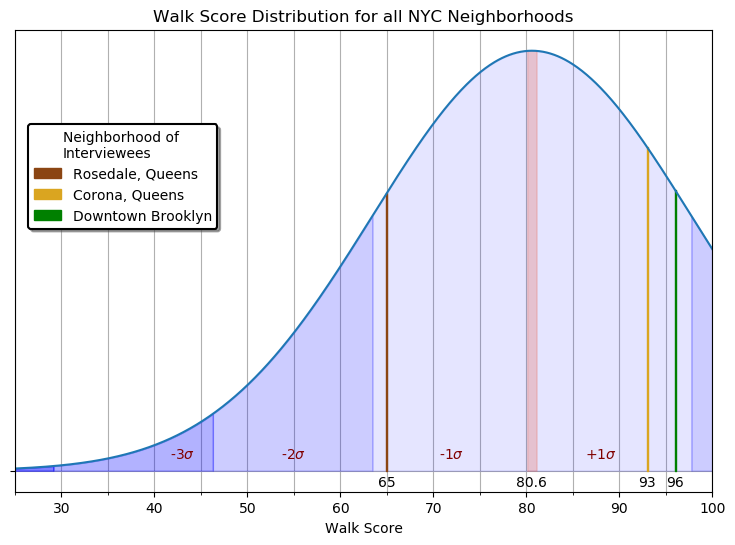

In [57]:
mu_a = np.mean(a)
sigma_a = np.std(a)
Err_a = sigma_a/(np.sqrt(np.count_nonzero(a)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_a,sigma_a)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_a - .5, mu_a + .5) 
y2 = norm.pdf(x1,mu_a,sigma_a)

# dist(+/-) the walkscore for Downtown Brooklyn
xD = np.linspace(96 - .07, 96 + .07)
xC = np.linspace(93 - .06, 93 + .06)
xR = np.linspace(65 - .05, 65 + .05)

y3 = norm.pdf(xD,mu_a,sigma_a)

dtb = norm(mu_a,sigma_a).pdf(96)
cor = norm(mu_a,sigma_a).pdf(93)
ros = norm(mu_a,sigma_a).pdf(65)

#plotting percentile shading
xoms = np.linspace(mu_a - sigma_a, mu_a + sigma_a)
yoms = norm.pdf(xoms,mu_a,sigma_a)

#2 std left of mean
xtsdl = np.linspace(mu_a - 2*sigma_a, mu_a - 1*sigma_a)
ytsdl = norm.pdf(xtsdl, mu_a, sigma_a)

#2 std right of mean
xtsdr = np.linspace(mu_a + 2*sigma_a, mu_a + 1*sigma_a)
ytsdr = norm.pdf(xtsdr, mu_a, sigma_a)

#3 std left of mean
xhsdl = np.linspace(mu_a - 3*sigma_a, mu_a - 2*sigma_a)
yhsdl = norm.pdf(xhsdl, mu_a, sigma_a)

#4std left of mean
xfsdl = np.linspace(mu_a - 4*sigma_a, mu_a - 3*sigma_a)
yfsdl = norm.pdf(xfsdl, mu_a, sigma_a)

# Plot the mafucker
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax.annotate("{:.1f}".format(mu_a), xy=(mu_a, -0.00025), ha='center', va='top')
ax.annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax.annotate("93", xy=(93,-0.00025), ha='center', va='top')
ax.annotate("96", xy=(96,-0.00025), ha='center', va='top')

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(72,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(55,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(43,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(88,0.0005), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)

ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

#ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size

ax.fill_between(xoms, yoms, 0, alpha = 0.1, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.2, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.2, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.3, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.5, color = 'b') #4std left of the mean

DTB = ax.fill_between(xD, dtb, 0, alpha = 1, color = 'g', label='Downtown Brooklyn') 
Corona = ax.fill_between(xC, cor, 0, alpha = 1, color = 'goldenrod', label='Corona, Queens') 
Rosedale = ax.fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown', label='Rosedale, Queens') 

leg = plt.legend(handles = [Rosedale, Corona, DTB], 
                 title = 'Neighborhood of \nInterviewees',
                 loc = 'upper left', 
                 bbox_to_anchor = (.009,.81),
                 fancybox = True,
                 shadow = True
                )
leg.get_frame().set_linewidth(1.5)
leg.get_frame().set_edgecolor("k")

ax.set_xlim([25,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for all NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for all NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

# 2. Walk Score for Low-Income Neighborhoods

In [4]:
l = np.array([96,96,95,95,95,95,94,94,94,94,93,93,93,92,92,90,89,89,89,88,88,85,83,77,71])
l

array([96, 96, 95, 95, 95, 95, 94, 94, 94, 94, 93, 93, 93, 92, 92, 90, 89,
       89, 89, 88, 88, 85, 83, 77, 71])

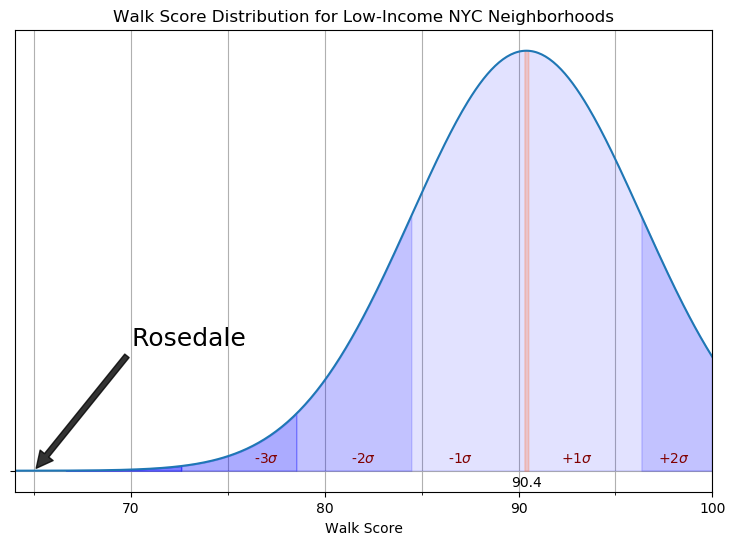

In [14]:
mu_l = np.mean(l)
sigma_l = np.std(l)
Err_l = sigma_l/(np.sqrt(np.count_nonzero(l)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_l,sigma_l)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_l - .1, mu_l + .1) 
#x1 = np.linspace(mu_l - Err_l, mu_l + Err_l)
y2 = norm.pdf(x1,mu_l,sigma_l)

# plotting percentile shading
xoms = np.linspace(mu_l - sigma_l, mu_l + sigma_l)
yoms = norm.pdf(xoms,mu_l,sigma_l)

# 2 std left of mean
xtsdl = np.linspace(mu_l - 2 * sigma_l, mu_l - 1*sigma_l)
ytsdl = norm.pdf(xtsdl, mu_l, sigma_l)

# 2 std right of mean
xtsdr = np.linspace(mu_l + 2 * sigma_l, mu_l + 1*sigma_l)
ytsdr = norm.pdf(xtsdr, mu_l, sigma_l)

# 3 std left of mean
xhsdl = np.linspace(mu_l - 3 * sigma_l, mu_l - 2*sigma_l)
yhsdl = norm.pdf(xhsdl, mu_l, sigma_l)

# 4std left of mean
xfsdl = np.linspace(mu_l - 4 * sigma_l, mu_l - 3*sigma_l)
yfsdl = norm.pdf(xfsdl, mu_l, sigma_l)

#Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_l), xy=(mu_l, -0.0008), ha='center', va='top') 
ax.annotate('Rosedale',
            xy = (65,0), 
            xytext = (70,0.02), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, lw = 1),
            fontsize = 18,
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(87,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(82,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(77,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(93,0.0008), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(98,0.0008), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.set_xlim([64,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Low-Income NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Low-Income NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

# 3. Walk Score for Black Neighborhoods

In [5]:
b = np.array([97,97,97,97,96,95,94,93,90,90,89,88,88,88,88,87,84,84,84,82,81,81,79,79,78,77,76,76,75,75,74,74,73,71,70,
              70,68,68,66,65,61,27,])
b

array([97, 97, 97, 97, 96, 95, 94, 93, 90, 90, 89, 88, 88, 88, 88, 87, 84,
       84, 84, 82, 81, 81, 79, 79, 78, 77, 76, 76, 75, 75, 74, 74, 73, 71,
       70, 70, 68, 68, 66, 65, 61, 27])

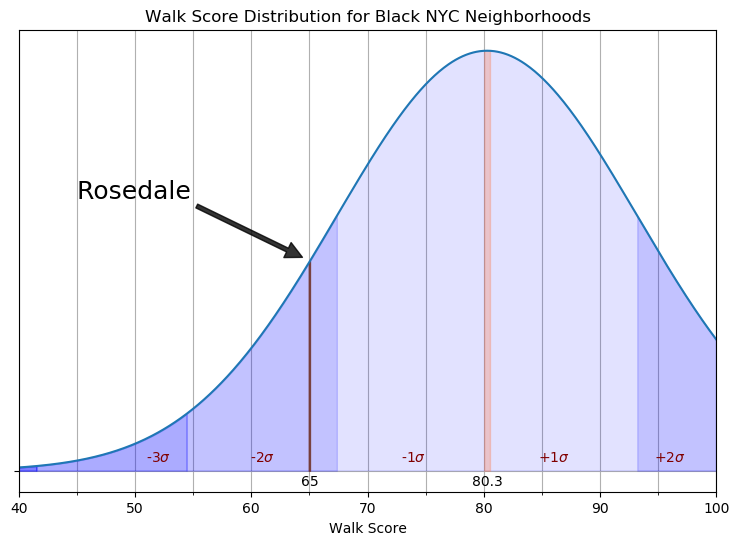

In [15]:
mu_b = np.mean(b)
sigma_b = np.std(b)
Err_b = sigma_b/(np.sqrt(np.count_nonzero(b)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_b,sigma_b)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_b - .25, mu_b + .25) 
y2 = norm.pdf(x1,mu_b,sigma_b)

# dist(+/-) the walkscore
x2 = np.linspace(65-.05, 65+.05)
y3 = norm.pdf(x2,mu_b,sigma_b)
#dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_b - sigma_b, mu_b + sigma_b)
yoms = norm.pdf(xoms,mu_b,sigma_b)

# 2 std left of mean
xtsdl = np.linspace(mu_b - 2 * sigma_b, mu_b - 1*sigma_b)
ytsdl = norm.pdf(xtsdl, mu_b, sigma_b)

# 2 std right of mean
xtsdr = np.linspace(mu_b + 2 * sigma_b, mu_b + 1*sigma_b)
ytsdr = norm.pdf(xtsdr, mu_b, sigma_b)

# 3 std left of mean
xhsdl = np.linspace(mu_b - 3 * sigma_b, mu_b - 2*sigma_b)
yhsdl = norm.pdf(xhsdl, mu_b, sigma_b)

# 4std left of mean
xfsdl = np.linspace(mu_b - 4 * sigma_b, mu_b - 3*sigma_b)
yfsdl = norm.pdf(xfsdl, mu_b, sigma_b)

#Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_b), xy=(mu_b, -0.00025), ha='center', va='top') 
ax.annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax.annotate('Rosedale',
            xy = (64.6,0.0156), #streamline the y prt 
            xytext = (45,0.02), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 18,
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(74,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(61,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(52,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(86,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(96,0.0005), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(x2, y3 , 0, alpha = 0.9, color = 'saddlebrown') #Rosedale 
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax.set_xlim([40,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Black NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Black NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

# 4. Walk Score for White Neighborhoods

In [6]:
W = np.array([100,100,100,100,100,100,100,99,99,99,99,99,99,99,99,99,99,99,99,99,98,98,98,98,98,97,97,97,97,97,97,97,
96,96,96,96,95,95,95,95,95,95,95,95,94,93,93,93,93,93,93,93,93,92,91,91,91,90,90,90,90,90,89,89,89,88,88,88,86,85,84,
84,83,83,82,82,82,82,80,79,79,79,79,77,77,77,77,75,75,74,74,72,72,72,71,71,71,70,70,70,68,67,67,66,66,66,65,65,65,64,
64,64,63,63,63,63,62,61,59,59,58,57,57,56,55,55,54,54,54,53,52,52,51,50,50,49,48,46,44,44,41,40,39,39,38,37,35,4,])
W

array([100, 100, 100, 100, 100, 100, 100,  99,  99,  99,  99,  99,  99,
        99,  99,  99,  99,  99,  99,  99,  98,  98,  98,  98,  98,  97,
        97,  97,  97,  97,  97,  97,  96,  96,  96,  96,  95,  95,  95,
        95,  95,  95,  95,  95,  94,  93,  93,  93,  93,  93,  93,  93,
        93,  92,  91,  91,  91,  90,  90,  90,  90,  90,  89,  89,  89,
        88,  88,  88,  86,  85,  84,  84,  83,  83,  82,  82,  82,  82,
        80,  79,  79,  79,  79,  77,  77,  77,  77,  75,  75,  74,  74,
        72,  72,  72,  71,  71,  71,  70,  70,  70,  68,  67,  67,  66,
        66,  66,  65,  65,  65,  64,  64,  64,  63,  63,  63,  63,  62,
        61,  59,  59,  58,  57,  57,  56,  55,  55,  54,  54,  54,  53,
        52,  52,  51,  50,  50,  49,  48,  46,  44,  44,  41,  40,  39,
        39,  38,  37,  35,   4])

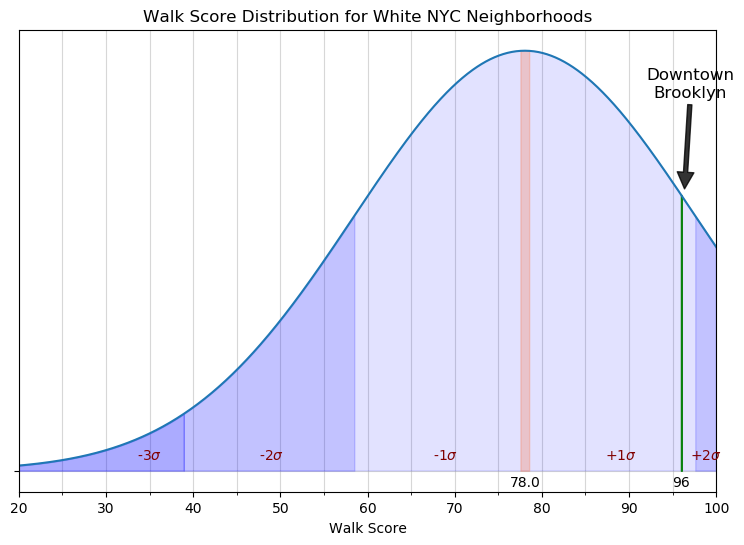

In [16]:
mu_W = np.mean(W)
sigma_W = np.std(W)
Err_W = sigma_W/(np.sqrt(np.count_nonzero(W)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_W,sigma_W)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_W - .5, mu_W + .5) 
y2 = norm.pdf(x1,mu_W,sigma_W)

# dist(+/-) the walkscore
x2 = np.linspace(96-.05, 96+.05)
y3 = norm.pdf(x2,mu_W,sigma_W)
#dtb = norm(mu_W,sigma_W).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_W - sigma_W, mu_W + sigma_W)
yoms = norm.pdf(xoms,mu_W,sigma_W)

# 2 std left of mean
xtsdl = np.linspace(mu_W - 2 * sigma_W, mu_W - 1*sigma_W)
ytsdl = norm.pdf(xtsdl, mu_W, sigma_W)

# 2 std right of mean
xtsdr = np.linspace(mu_W + 2 * sigma_W, mu_W + 1*sigma_W)
ytsdr = norm.pdf(xtsdr, mu_W, sigma_W)

# 3 std left of mean
xhsdl = np.linspace(mu_W - 3 * sigma_W, mu_W - 2*sigma_W)
yhsdl = norm.pdf(xhsdl, mu_W, sigma_W)

# 4std left of mean
xfsdl = np.linspace(mu_W - 4 * sigma_W, mu_W - 3*sigma_W)
yfsdl = norm.pdf(xfsdl, mu_W, sigma_W)

# Plot 
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_W), xy=(mu_W, -.00025), ha='center', va='top') 
ax.annotate("96", xy=(96,-.00025), ha='center', va='top')
ax.annotate('Downtown\nBrooklyn',
            xy = (96.35,0.0136), #streamline the y prt. arrays don't work here 
            xytext = (97,0.0180), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(69,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(49,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(35,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(89,0.0004), ha='center', va='bottom', color='maroon')
ax.annotate("+2$\sigma$", xy=(97,0.0004), ha='left', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(x2, y3,0, alpha = 0.9, color = 'g') #Downtown Brooklyn
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.set_xlim([20,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for White NYC Neighborhoods')


#plt.savefig('Walk Score Distribution for White NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

# 5. Walk Score for Latino Neighborhoods

In [7]:
H = np.array([97,96,96,96,96,95,95,95,95,95,95,95,94,94,94,94,94,94,93,93,93,93,92,92,92,92,92,92,91,90,90,90,89,89,
88,88,88,88,88,88,85,84,83,83,82,81,79,77,75,73,71,27,4])
H

array([97, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 94,
       94, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 91, 90, 90, 90, 89, 89,
       88, 88, 88, 88, 88, 88, 85, 84, 83, 83, 82, 81, 79, 77, 75, 73, 71,
       27,  4])

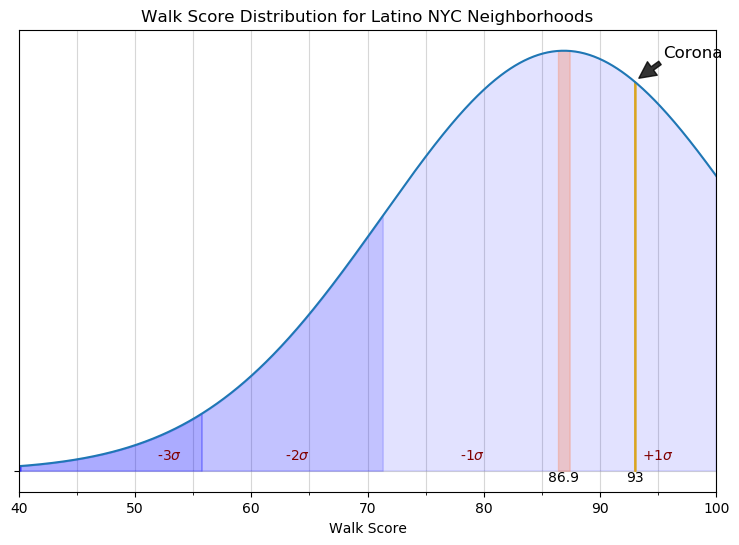

In [17]:
mu_H = np.mean(H)
sigma_H = np.std(H)
Err_H = sigma_H/(np.sqrt(np.count_nonzero(H)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_H,sigma_H)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_H - .5, mu_H + .5) 
y2 = norm.pdf(x1,mu_H,sigma_H)

# dist(+/-) the walkscore
x2 = np.linspace(93-.05, 93+.05)
y3 = norm.pdf(x2,mu_H,sigma_H)
cor = norm(mu_H,sigma_H).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_H - sigma_H, mu_H + sigma_H)
yoms = norm.pdf(xoms,mu_H,sigma_H)

# 2 std left of mean
xtsdl = np.linspace(mu_H - 2 * sigma_H, mu_H - 1*sigma_H)
ytsdl = norm.pdf(xtsdl, mu_H, sigma_H)

# 2 std right of mean
xtsdr = np.linspace(mu_H + 2 * sigma_H, mu_H + 1*sigma_H)
ytsdr = norm.pdf(xtsdr, mu_H, sigma_H)

# 3 std left of mean
xhsdl = np.linspace(mu_H - 3 * sigma_H, mu_H - 2*sigma_H)
yhsdl = norm.pdf(xhsdl, mu_H, sigma_H)

# 4std left of mean
xfsdl = np.linspace(mu_H - 4 * sigma_H, mu_H - 3*sigma_H)
yfsdl = norm.pdf(xfsdl, mu_H, sigma_H)

# Plot the mafucker
#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_H), xy=(mu_H, 0), ha='center', va='top') 
ax.annotate("93", xy=(93,0), ha='center', va='top')
ax.annotate('Corona',
            xy = (93.3,0.0239), #streamline the y prt. arrays don't work here 
            xytext = (98,0.025), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'bottom'
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(79,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(64,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(53,0.0005), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(95,0.0005), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax.fill_between(x2, y3,0, alpha = 1, color = 'goldenrod') #Corona

ax.set_xlim([40,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Latino NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Latino NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

# 6. Walk Score for Wealthy Neighborhoods

In [8]:
R = np.array([100,99,99,99,97,96,95,91])
R

array([100,  99,  99,  99,  97,  96,  95,  91])

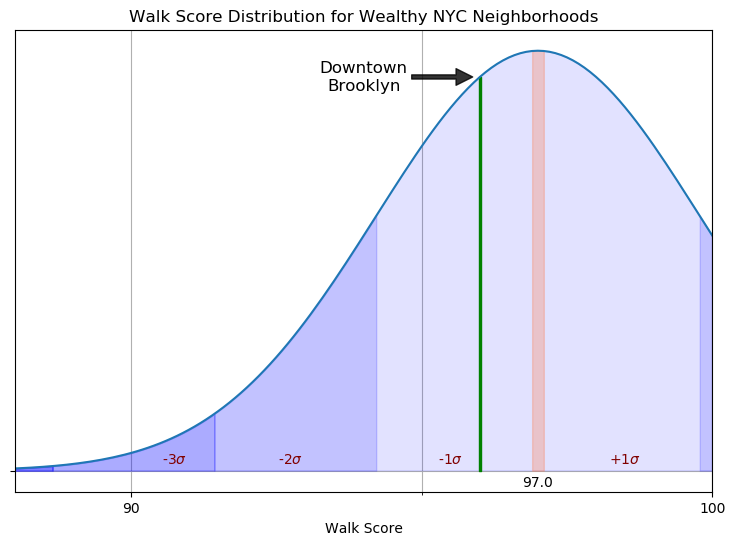

In [18]:
mu_R = np.mean(R)
sigma_R = np.std(R)
Err_R = sigma_R/(np.sqrt(np.count_nonzero(R)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_R,sigma_R)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_R - .1, mu_R + .1) 
y2 = norm.pdf(x1,mu_R,sigma_R)

# dist(+/-) the walkscore
x2 = np.linspace(96-.020, 96+.020)
y3 = norm.pdf(x2,mu_R,sigma_R)
dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_R - sigma_R, mu_R + sigma_R)
yoms = norm.pdf(xoms,mu_R,sigma_R)

# 2 std left of mean
xtsdl = np.linspace(mu_R - 2 * sigma_R, mu_R - 1*sigma_R)
ytsdl = norm.pdf(xtsdl, mu_R, sigma_R)

# 2 std right of mean
xtsdr = np.linspace(mu_R + 2 * sigma_R, mu_R + 1*sigma_R)
ytsdr = norm.pdf(xtsdr, mu_R, sigma_R)

# 3 std left of mean
xhsdl = np.linspace(mu_R - 3 * sigma_R, mu_R - 2*sigma_R)
yhsdl = norm.pdf(xhsdl, mu_R, sigma_R)

# 4std left of mean
xfsdl = np.linspace(mu_R - 4 * sigma_R, mu_R - 3*sigma_R)
yfsdl = norm.pdf(xfsdl, mu_R, sigma_R)

#plt.style.use('fivethirtyeight')
plt.style.use('default')
fig,ax = plt.subplots(figsize = (9,6))
ax.plot(x,y)

ax.annotate("{:.1f}".format(mu_R), xy=(mu_R, -0.0015), ha='center', va='top') 
ax.annotate('Downtown\nBrooklyn',
            xy = (95.9, dtb), #streamline the y prt. arrays don't work here 
            xytext = (94, dtb), 
            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
            fontsize = 12,
            ha = 'center',
            va = 'center'
           )

# Annotate 1,2,3 STD +/- the mean
ax.annotate("-1$\sigma$", xy=(95.5,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("-2$\sigma$", xy=(92.75,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("-3$\sigma$", xy=(90.75,0.0015), ha='center', va='bottom', color='maroon')
ax.annotate("+1$\sigma$", xy=(98.5,0.0015), ha='center', va='bottom', color='maroon')

ax.set_xticks(np.arange(0, 101, 10)) 
ax.set_xticks(np.arange(0, 96, 5), minor=True) 
ax.set_yticks(np.arange(0, 1, 10))
ax.set_yticks(np.arange(0, 1, 20), minor=True)
ax.set_axisbelow(True)
ax.grid(which='minor', alpha=1)
ax.grid(which='major', alpha=1)

ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax.fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size

ax.fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax.fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax.fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax.fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax.fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax.fill_between(x2, dtb, 0, alpha = 1, color = 'g') #Downtown Brooklyn
ax.set_xlim([88,100])
ax.set_xlabel('Walk Score')
ax.set_yticklabels([])
ax.set_title('Walk Score Distribution for Wealthy NYC Neighborhoods')

#plt.savefig('Walk Score Distribution for Wealthy NYC Neighborhoods', dpi = 90, bbox_inches='tight')
plt.show()

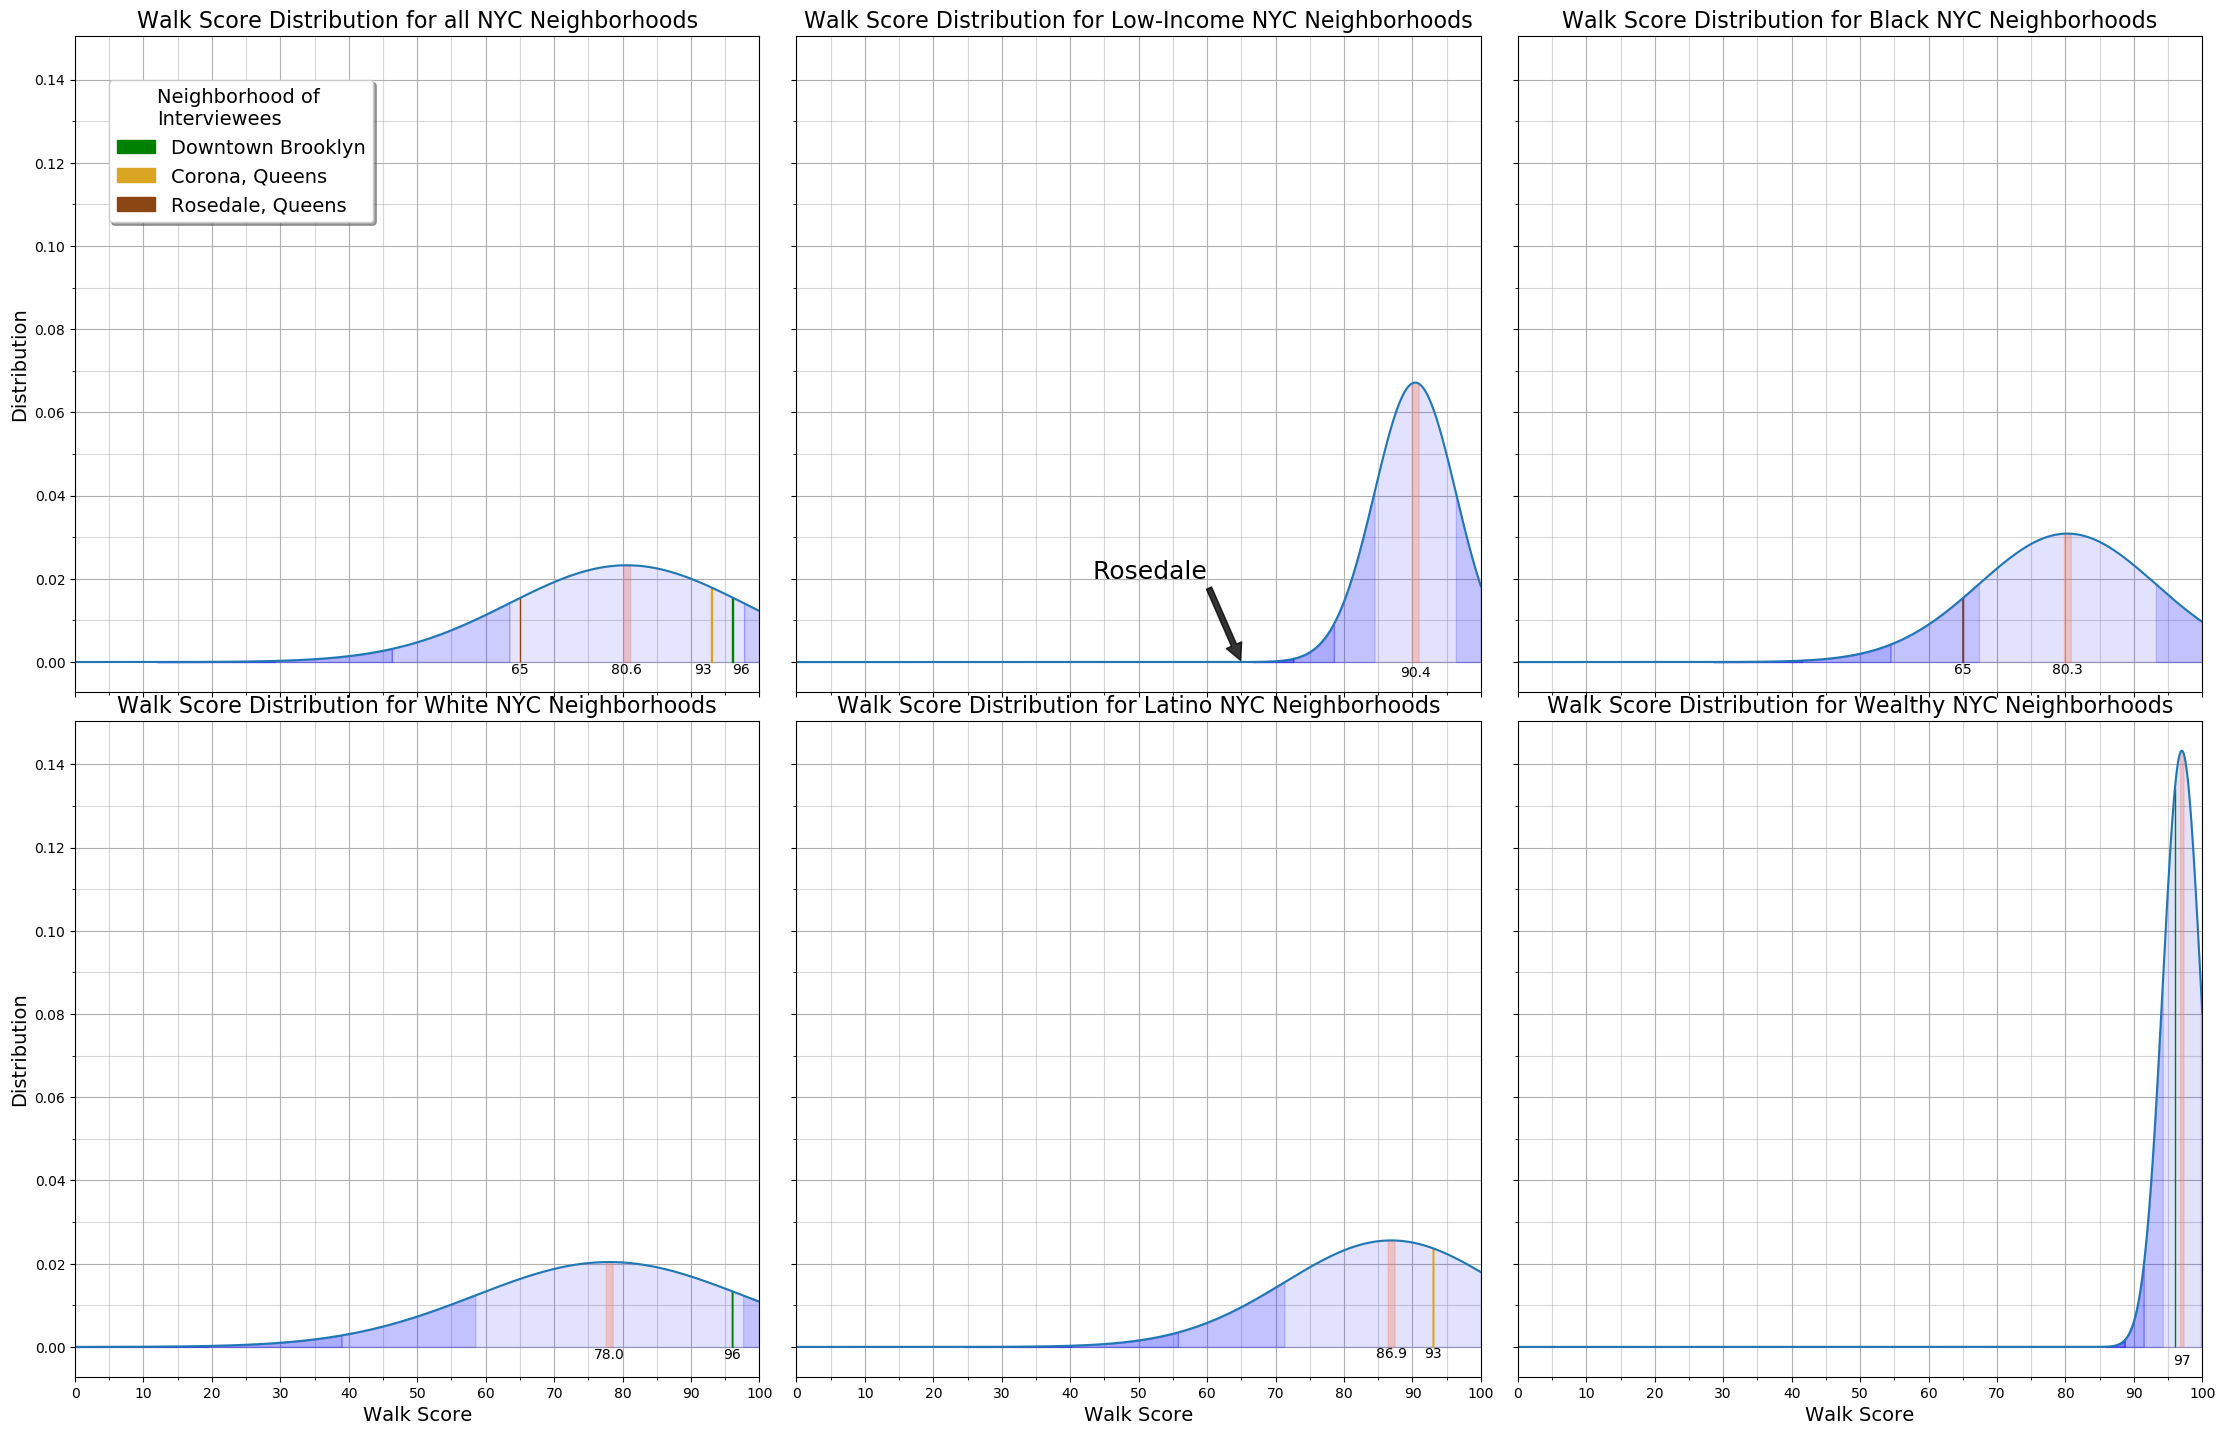

In [118]:
plt.style.use('default')
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(22,14)) #figsizs=(width,height)
plt.tight_layout()

#####################################################################################################################
#mu_a = np.mean(a)
#sigma_a = np.std(a)
#Err_a = sigma_a/(np.sqrt(np.count_nonzero(a)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_a,sigma_a)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_a - .5, mu_a + .5) 
y2 = norm.pdf(x1,mu_a,sigma_a)

# dist(+/-) the walkscore for Downtown Brooklyn
xD = np.linspace(96 - .07, 96 + .07)
xC = np.linspace(93 - .06, 93 + .06)
xR = np.linspace(65 - .05, 65 + .05)

y3 = norm.pdf(xD,mu_a,sigma_a)

dtb = norm(mu_a,sigma_a).pdf(96)
cor = norm(mu_a,sigma_a).pdf(93)
ros = norm(mu_a,sigma_a).pdf(65)

#plotting percentile shading
xoms = np.linspace(mu_a - sigma_a, mu_a + sigma_a)
yoms = norm.pdf(xoms,mu_a,sigma_a)

#2 std left of mean
xtsdl = np.linspace(mu_a - 2*sigma_a, mu_a - 1*sigma_a)
ytsdl = norm.pdf(xtsdl, mu_a, sigma_a)

#2 std right of mean
xtsdr = np.linspace(mu_a + 2*sigma_a, mu_a + 1*sigma_a)
ytsdr = norm.pdf(xtsdr, mu_a, sigma_a)

#3 std left of mean
xhsdl = np.linspace(mu_a - 3*sigma_a, mu_a - 2*sigma_a)
yhsdl = norm.pdf(xhsdl, mu_a, sigma_a)

#4std left of mean
xfsdl = np.linspace(mu_a - 4*sigma_a, mu_a - 3*sigma_a)
yfsdl = norm.pdf(xfsdl, mu_a, sigma_a)

# Plot the mafucker
#plt.style.use('fivethirtyeight')
#plt[0].style.use('default')
#fig,ax = plt.subplots(figsize = (9,6))
ax[0,0].plot(x,y)

#axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
ax[0,0].annotate("{:.1f}".format(mu_a), xy=(mu_a, -0.00025), ha='center', va='top')
ax[0,0].annotate("65", xy=(65,-0.00025), ha='center', va='top')
ax[0,0].annotate("93", xy=(93,-0.00025), ha='right', va='top')
ax[0,0].annotate("96", xy=(96,-0.00025), ha='left', va='top')

# Annotate 1,2,3 STD +/- the mean
#ax[0,0].annotate("-1$\sigma$", xy=(72,0.0005), ha='center', va='bottom', color='maroon')
#ax[0,0].annotate("-2$\sigma$", xy=(55,0.0005), ha='center', va='bottom', color='maroon')
#ax[0,0].annotate("-3$\sigma$", xy=(43,0.0005), ha='center', va='bottom', color='maroon')
#ax[0,0].annotate("+1$\sigma$", xy=(88,0.0005), ha='center', va='bottom', color='maroon')

ax[0,0].set_xticks(np.arange(0, 101, 10)) 
ax[0,0].set_xticks(np.arange(0, 96, 5), minor=True) 
ax[0,0].set_yticks(np.arange(0, .14, .02))
ax[0,0].set_yticks(np.arange(0, .15, .010), minor=True)
ax[0,0].set_axisbelow(True)
ax[0,0].grid(which='minor', alpha=.5)
ax[0,0].grid(which='major', alpha=1)

#ax.fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[0,0].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size

ax[0,0].fill_between(xoms, yoms, 0, alpha = 0.1, color = 'b')   #1 std left and right of the mean
ax[0,0].fill_between(xtsdl, ytsdl, 0, alpha = 0.2, color = 'b') #2 std left of mean
ax[0,0].fill_between(xtsdr, ytsdr, 0, alpha = 0.2, color = 'b') #2 std right of mean
ax[0,0].fill_between(xhsdl, yhsdl, 0, alpha = 0.3, color = 'b') #3 std left of mean
ax[0,0].fill_between(xfsdl, yfsdl, 0, alpha = 0.5, color = 'b') #4std left of the mean

DTB = ax[0,0].fill_between(xD, dtb, 0, alpha = 1, color = 'g', label='Downtown Brooklyn') 
Corona = ax[0,0].fill_between(xC, cor, 0, alpha = 1, color = 'goldenrod', label='Corona, Queens') 
Rosedale = ax[0,0].fill_between(xR, ros, 0, alpha = 1, color = 'saddlebrown', label='Rosedale, Queens') 

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, 
           labels, 
           loc='upper left',
           bbox_to_anchor = (.045,.975),
           fontsize=14,
           title = 'Neighborhood of \nInterviewees',
           title_fontsize=14,
           fancybox = True,
           shadow = True
           )
leg.get_frame().set_linewidth(1.5)
leg.get_frame().set_edgecolor("k")

ax[0,0].set_xlim([0,100])
#ax[0,0].set_xlabel('Walk Score')
ax[0,0].set_ylabel('Distribution', fontsize=14)
#ax[0,0].set_yticklabels([])
ax[0,0].set_title('Walk Score Distribution for all NYC Neighborhoods', fontsize=16)

#####################################################################################################################

#mu_l = np.mean(l)
#sigma_l = np.std(l)
#Err_l = sigma_l/(np.sqrt(np.count_nonzero(l)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_l,sigma_l)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_l - .5, mu_l + .5) 
#x1 = np.linspace(mu_l - Err_l, mu_l + Err_l)
y2 = norm.pdf(x1,mu_l,sigma_l)

# plotting percentile shading
xoms = np.linspace(mu_l - sigma_l, mu_l + sigma_l)
yoms = norm.pdf(xoms,mu_l,sigma_l)

# 2 std left of mean
xtsdl = np.linspace(mu_l - 2 * sigma_l, mu_l - 1*sigma_l)
ytsdl = norm.pdf(xtsdl, mu_l, sigma_l)

# 2 std right of mean
xtsdr = np.linspace(mu_l + 2 * sigma_l, mu_l + 1*sigma_l)
ytsdr = norm.pdf(xtsdr, mu_l, sigma_l)

# 3 std left of mean
xhsdl = np.linspace(mu_l - 3 * sigma_l, mu_l - 2*sigma_l)
yhsdl = norm.pdf(xhsdl, mu_l, sigma_l)

# 4std left of mean
xfsdl = np.linspace(mu_l - 4 * sigma_l, mu_l - 3*sigma_l)
yfsdl = norm.pdf(xfsdl, mu_l, sigma_l)

#Plot 
#plt.style.use('fivethirtyeight')
#plt.style.use('default')
#fig,ax = plt.subplots(figsize = (9,6))
ax[0,1].plot(x,y)

ax[0,1].annotate("{:.1f}".format(mu_l), xy=(mu_l, -0.0008), ha='center', va='top') 
ax[0,1].annotate('Rosedale',
                 xy = (65,0), 
                 xytext = (60,0.02), 
                 arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, lw = 1),
                 fontsize = 18,
                 ha='right'
                )

# Annotate 1,2,3 STD +/- the mean
#ax[0,1].annotate("-1$\sigma$", xy=(87,0.0008), ha='center', va='bottom', color='maroon')
#ax[0,1].annotate("-2$\sigma$", xy=(82,0.0008), ha='center', va='bottom', color='maroon')
#ax[0,1].annotate("-3$\sigma$", xy=(77,0.0008), ha='center', va='bottom', color='maroon')
#ax[0,1].annotate("+1$\sigma$", xy=(93,0.0008), ha='center', va='bottom', color='maroon')
#ax[0,1].annotate("+2$\sigma$", xy=(98,0.0008), ha='center', va='bottom', color='maroon')

ax[0,1].set_xticks(np.arange(0, 101, 10)) 
ax[0,1].set_xticks(np.arange(0, 96, 5), minor=True) 
ax[0,1].set_yticks(np.arange(0, .1, .10))
ax[0,1].set_yticks(np.arange(0, .1, .020), minor=True)
ax[0,1].set_axisbelow(True)
ax[0,1].grid(which='minor', alpha=.5)
ax[0,1].grid(which='major', alpha=1)

ax[0,1].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[0,1].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[0,1].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[0,1].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[0,1].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[0,1].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[0,1].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax[0,1].set_xlim([0,100])
#ax[0,1].set_xlabel('Walk Score')
#ax[0,1].set_ylabel('Distribution')
#ax[0,1].set_yticklabels([])
ax[0,1].set_title('Walk Score Distribution for Low-Income NYC Neighborhoods', fontsize=16)

#####################################################################################################################

#mu_b = np.mean(b)
#sigma_b = np.std(b)
#Err_b = sigma_b/(np.sqrt(np.count_nonzero(b)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_b,sigma_b)

#This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_b - .5, mu_b + .5) 
y2 = norm.pdf(x1,mu_b,sigma_b)

# dist(+/-) the walkscore
x2 = np.linspace(65-.05, 65+.05)
y3 = norm.pdf(x2,mu_b,sigma_b)
#dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_b - sigma_b, mu_b + sigma_b)
yoms = norm.pdf(xoms,mu_b,sigma_b)

# 2 std left of mean
xtsdl = np.linspace(mu_b - 2 * sigma_b, mu_b - 1*sigma_b)
ytsdl = norm.pdf(xtsdl, mu_b, sigma_b)

# 2 std right of mean
xtsdr = np.linspace(mu_b + 2 * sigma_b, mu_b + 1*sigma_b)
ytsdr = norm.pdf(xtsdr, mu_b, sigma_b)

# 3 std left of mean
xhsdl = np.linspace(mu_b - 3 * sigma_b, mu_b - 2*sigma_b)
yhsdl = norm.pdf(xhsdl, mu_b, sigma_b)

# 4std left of mean
xfsdl = np.linspace(mu_b - 4 * sigma_b, mu_b - 3*sigma_b)
yfsdl = norm.pdf(xfsdl, mu_b, sigma_b)

#Plot 
#plt.style.use('fivethirtyeight')
#plt[2].style.use('default')
#fig,ax = plt.subplots(figsize = (9,6))
ax[0,2].plot(x,y)

ax[0,2].annotate("{:.1f}".format(mu_b), xy=(mu_b, -0.00025), ha='center', va='top') 
ax[0,2].annotate("65", xy=(65,-0.00025), ha='center', va='top')
#ax[0,2].annotate('Rosedale',
#            xy = (64.6,0.0156), #streamline the y prt 
#            xytext = (45,0.02), 
#            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
#            fontsize = 18,
#           )

# Annotate 1,2,3 STD +/- the mean
#ax[0,2].annotate("-1$\sigma$", xy=(74,0.0005), ha='center', va='bottom', color='maroon')
#ax[0,2].annotate("-2$\sigma$", xy=(61,0.0005), ha='center', va='bottom', color='maroon')
#ax[0,2].annotate("-3$\sigma$", xy=(52,0.0005), ha='center', va='bottom', color='maroon')
#ax[0,2].annotate("+1$\sigma$", xy=(86,0.0005), ha='center', va='bottom', color='maroon')
#ax[0,2].annotate("+2$\sigma$", xy=(96,0.0005), ha='center', va='bottom', color='maroon')

ax[0,2].set_xticks(np.arange(0, 101, 10)) 
ax[0,2].set_xticks(np.arange(0, 96, 5), minor=True) 
ax[0,2].set_yticks(np.arange(0, .1, .10))
ax[0,2].set_yticks(np.arange(0, .1, .020), minor=True)
ax[0,2].set_axisbelow(True)
ax[0,2].grid(which='minor', alpha=.5)
ax[0,2].grid(which='major', alpha=1)

ax[0,2].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[0,2].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[0,2].fill_between(x2, y3 , 0, alpha = 0.9, color = 'saddlebrown') #Rosedale 
ax[0,2].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[0,2].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[0,2].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[0,2].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[0,2].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax[0,2].set_xlim([0,100])
#ax[0,2].set_xlabel('Walk Score')
#ax[0,2].set_ylabel('Distribution')
#ax[0,2].set_yticklabels([])
ax[0,2].set_title('Walk Score Distribution for Black NYC Neighborhoods', fontsize=16)

#####################################################################################################################

#mu_W = np.mean(W)
#sigma_W = np.std(W)
#Err_W = sigma_W/(np.sqrt(np.count_nonzero(W)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_W,sigma_W)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_W - .5, mu_W + .5) 
y2 = norm.pdf(x1,mu_W,sigma_W)

# dist(+/-) the walkscore
x2 = np.linspace(96-.05, 96+.05)
y3 = norm.pdf(x2,mu_W,sigma_W)
dtb = norm(mu_W,sigma_W).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_W - sigma_W, mu_W + sigma_W)
yoms = norm.pdf(xoms,mu_W,sigma_W)

# 2 std left of mean
xtsdl = np.linspace(mu_W - 2 * sigma_W, mu_W - 1*sigma_W)
ytsdl = norm.pdf(xtsdl, mu_W, sigma_W)

# 2 std right of mean
xtsdr = np.linspace(mu_W + 2 * sigma_W, mu_W + 1*sigma_W)
ytsdr = norm.pdf(xtsdr, mu_W, sigma_W)

# 3 std left of mean
xhsdl = np.linspace(mu_W - 3 * sigma_W, mu_W - 2*sigma_W)
yhsdl = norm.pdf(xhsdl, mu_W, sigma_W)

# 4std left of mean
xfsdl = np.linspace(mu_W - 4 * sigma_W, mu_W - 3*sigma_W)
yfsdl = norm.pdf(xfsdl, mu_W, sigma_W)

# Plot 
#plt.style.use('fivethirtyeight')
#plt[3].style.use('default')
#fig,ax = plt.subplots(figsize = (9,6))
ax[1,0].plot(x,y)

ax[1,0].annotate("{:.1f}".format(mu_W), xy=(mu_W, -.00025), ha='center', va='top') 
ax[1,0].annotate("96", xy=(96,-.00025), ha='center', va='top')
#ax[1,0].annotate('Downtown\nBrooklyn',
#            xy = (96.35,0.0136), #streamline the y prt. arrays don't work here 
#            xytext = (97,0.0180), 
#            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
#            fontsize = 12,
#            ha = 'center',
#            va = 'bottom'
#           )

# Annotate 1,2,3 STD +/- the mean
#ax[1,0].annotate("-1$\sigma$", xy=(69,0.0004), ha='center', va='bottom', color='maroon')
#ax[1,0].annotate("-2$\sigma$", xy=(49,0.0004), ha='center', va='bottom', color='maroon')
#ax[1,0].annotate("-3$\sigma$", xy=(35,0.0004), ha='center', va='bottom', color='maroon')
#ax[1,0].annotate("+1$\sigma$", xy=(89,0.0004), ha='center', va='bottom', color='maroon')
#ax[1,0].annotate("+2$\sigma$", xy=(97,0.0004), ha='left', va='bottom', color='maroon')

ax[1,0].set_xticks(np.arange(0, 101, 10)) 
ax[1,0].set_xticks(np.arange(0, 96, 5), minor=True) 
ax[1,0].set_yticks(np.arange(0, .1, .10))
ax[1,0].set_yticks(np.arange(0, .1, .020), minor=True)
ax[1,0].set_axisbelow(True)
ax[1,0].grid(which='minor', alpha=0.5)
ax[1,0].grid(which='major', alpha=1)

ax[1,0].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[1,0].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[1,0].fill_between(x2, y3,0, alpha = 0.9, color = 'g') #Downtown Brooklyn
ax[1,0].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[1,0].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[1,0].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[1,0].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[1,0].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean

ax[1,0].set_xlim([0,100])
ax[1,0].set_xlabel('Walk Score', fontsize=14)
ax[1,0].set_ylabel('Distribution', fontsize=14)
#ax[1,0].set_yticklabels([])
ax[1,0].set_title('Walk Score Distribution for White NYC Neighborhoods', fontsize=16)

#####################################################################################################################

#mu_H = np.mean(H)
#sigma_H = np.std(H)
#Err_H = sigma_H/(np.sqrt(np.count_nonzero(H)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_H,sigma_H)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_H - .5, mu_H + .5) 
y2 = norm.pdf(x1,mu_H,sigma_H)

# dist(+/-) the walkscore
x2 = np.linspace(93-.05, 93+.05)
y3 = norm.pdf(x2,mu_H,sigma_H)
cor = norm(mu_H,sigma_H).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_H - sigma_H, mu_H + sigma_H)
yoms = norm.pdf(xoms,mu_H,sigma_H)

# 2 std left of mean
xtsdl = np.linspace(mu_H - 2 * sigma_H, mu_H - 1*sigma_H)
ytsdl = norm.pdf(xtsdl, mu_H, sigma_H)

# 2 std right of mean
xtsdr = np.linspace(mu_H + 2 * sigma_H, mu_H + 1*sigma_H)
ytsdr = norm.pdf(xtsdr, mu_H, sigma_H)

# 3 std left of mean
xhsdl = np.linspace(mu_H - 3 * sigma_H, mu_H - 2*sigma_H)
yhsdl = norm.pdf(xhsdl, mu_H, sigma_H)

# 4std left of mean
xfsdl = np.linspace(mu_H - 4 * sigma_H, mu_H - 3*sigma_H)
yfsdl = norm.pdf(xfsdl, mu_H, sigma_H)

# Plot the mafucker
#plt[4].style.use('fivethirtyeight')
#fig,ax = plt.subplots(figsize = (9,6))
ax[1,1].plot(x,y)

ax[1,1].annotate("{:.1f}".format(mu_H), xy=(mu_H, 0), ha='center', va='top') 
ax[1,1].annotate("93", xy=(93,0), ha='center', va='top')
#ax[1,1].annotate('Corona',
#            xy = (93.3,0.0239), #streamline the y prt. arrays don't work here 
#            xytext = (98,0.025), 
#            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
#            fontsize = 12,
#            ha = 'center',
#            va = 'bottom'
#           )

# Annotate 1,2,3 STD +/- the mean
#ax[1,1].annotate("-1$\sigma$", xy=(79,0.0005), ha='center', va='bottom', color='maroon')
#ax[1,1].annotate("-2$\sigma$", xy=(64,0.0005), ha='center', va='bottom', color='maroon')
#ax[1,1].annotate("-3$\sigma$", xy=(53,0.0005), ha='center', va='bottom', color='maroon')
#ax[1,1].annotate("+1$\sigma$", xy=(95,0.0005), ha='center', va='bottom', color='maroon')

ax[1,1].set_xticks(np.arange(0, 101, 10)) 
ax[1,1].set_xticks(np.arange(0, 96, 5), minor=True) 
ax[1,1].set_yticks(np.arange(0, .1, .10))
ax[1,1].set_yticks(np.arange(0, .1, .020), minor=True)
ax[1,1].set_axisbelow(True)
ax[1,1].grid(which='minor', alpha=.5)
ax[1,1].grid(which='major', alpha=1)

ax[1,1].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[1,1].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[1,1].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[1,1].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[1,1].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[1,1].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[1,1].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax[1,1].fill_between(x2, y3,0, alpha = 1, color = 'goldenrod') #Corona

ax[1,1].set_xlim([0,100])
ax[1,1].set_xlabel('Walk Score', fontsize=14)
#ax[1,1].set_ylabel('Distribution')
#ax[1,1].set_yticklabels([])
ax[1,1].set_title('Walk Score Distribution for Latino NYC Neighborhoods', fontsize=16)

#####################################################################################################################

#mu_R = np.mean(R)
#sigma_R = np.std(R)
#Err_R = sigma_R/(np.sqrt(np.count_nonzero(R)))

x =  np.linspace(0,100,1000)
y = norm.pdf(x,mu_R,sigma_R)

# This is for filling in 1 plus/minus the mean
x1 = np.linspace(mu_R - .25, mu_R + .25) 
y2 = norm.pdf(x1,mu_R,sigma_R)

# dist(+/-) the walkscore
x2 = np.linspace(96-.020, 96+.020)
y3 = norm.pdf(x2,mu_R,sigma_R)
dtb = norm(mu_R,sigma_R).pdf(96)

# plotting percentile shading
xoms = np.linspace(mu_R - sigma_R, mu_R + sigma_R)
yoms = norm.pdf(xoms,mu_R,sigma_R)

# 2 std left of mean
xtsdl = np.linspace(mu_R - 2 * sigma_R, mu_R - 1*sigma_R)
ytsdl = norm.pdf(xtsdl, mu_R, sigma_R)

# 2 std right of mean
xtsdr = np.linspace(mu_R + 2 * sigma_R, mu_R + 1*sigma_R)
ytsdr = norm.pdf(xtsdr, mu_R, sigma_R)

# 3 std left of mean
xhsdl = np.linspace(mu_R - 3 * sigma_R, mu_R - 2*sigma_R)
yhsdl = norm.pdf(xhsdl, mu_R, sigma_R)

# 4std left of mean
xfsdl = np.linspace(mu_R - 4 * sigma_R, mu_R - 3*sigma_R)
yfsdl = norm.pdf(xfsdl, mu_R, sigma_R)

#plt.style.use('fivethirtyeight')
#plt[5].style.use('default')
#fig,ax = plt.subplots(figsize = (9,6))
ax[1,2].plot(x,y)

ax[1,2].annotate("{:.0f}".format(mu_R), xy=(mu_R, -0.0015), ha='center', va='top') 
#ax[1,2].annotate('Downtown\nBrooklyn',
#            xy = (95.9, dtb), #streamline the y prt. arrays don't work here 
#            xytext = (94, dtb), 
#            arrowprops = dict(facecolor = 'black', alpha = .8, shrink = 0.02, width = 3),
#            fontsize = 12,
#            ha = 'center',
#            va = 'center'
#           )

# Annotate 1,2,3 STD +/- the mean
#ax[1,2].annotate("-1$\sigma$", xy=(95.5,0.0015), ha='center', va='bottom', color='maroon')
#ax[1,2].annotate("-2$\sigma$", xy=(92.75,0.0015), ha='center', va='bottom', color='maroon')
#ax[1,2].annotate("-3$\sigma$", xy=(90.75,0.0015), ha='center', va='bottom', color='maroon')
#ax[1,2].annotate("+1$\sigma$", xy=(98.5,0.0015), ha='center', va='bottom', color='maroon')

ax[1,2].set_xticks(np.arange(0, 101, 10)) 
ax[1,2].set_xticks(np.arange(0, 96, 5), minor=True) 
ax[1,2].set_yticks(np.arange(0, .14, .02))
ax[1,2].set_yticks(np.arange(0, .15, .010), minor=True)
ax[1,2].set_axisbelow(True)
ax[1,2].grid(which='minor', alpha=.5)
ax[1,2].grid(which='major', alpha=1)

ax[1,2].fill_between(x, y, 0, alpha = 0.1, color = 'b')
ax[1,2].fill_between(x1, y2, 0, alpha = 0.3, color = 'coral') #function must accept x1,y2. Not x,y because of matrix size
ax[1,2].fill_between(xoms, yoms, 0, alpha = 0.01, color = 'b')   #1 std left and right of the mean
ax[1,2].fill_between(xtsdl, ytsdl, 0, alpha = 0.15, color = 'b') #2 std left of mean
ax[1,2].fill_between(xtsdr, ytsdr, 0, alpha = 0.15, color = 'b') #2 std right of mean
ax[1,2].fill_between(xhsdl, yhsdl, 0, alpha = 0.25, color = 'b') #3 std left of mean
ax[1,2].fill_between(xfsdl, yfsdl, 0, alpha = 0.45, color = 'b') #4std left of the mean
ax[1,2].fill_between(x2, dtb, 0, alpha = 1, color = 'g') #Downtown Brooklyn

ax[1,2].set_xlim([0,100])
ax[1,2].set_xlabel('Walk Score', fontsize=14)
#ax[1,2].set_ylabel('Distribution')
#ax[1,2].set_yticklabels([])
ax[1,2].set_title('Walk Score Distribution for Wealthy NYC Neighborhoods', fontsize=16)

plt.savefig('6 tight distributions', dpi=90, bbox_inches='tight')